In [ ]:
# Ce Projet consiste à récupérer de façon automatique les données sur le site https://citedelinfini.fr/teams
# et à en faire différents graphiques en rapport avec l'évenement

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import datetime
import math

heure = datetime.now().strftime('[%d/%m/%Y %H:%M]')

In [2]:
# définition des fonctions

In [3]:
def f_url(n):
    res = ['https://citedelinfini.fr/teams']
    for i in range(2,n+1):
        res.append('https://citedelinfini.fr/teams?page=%s' % (i))
    return res

In [4]:
def data(url):
    # récuperer tous les tds
    TD = []
    for site in url:
        reponse = requests.get(site)
        
        tds = []
        
        if reponse.ok:
            soup = BeautifulSoup(reponse.text)
            tds = soup.findAll('td')
        
        TD = TD + tds
    
    return TD

In [5]:
def tag(donnée):
    # récupérer les tags
    
    tag1 = []
    for i in range(len(donnée)//4):
        tag1.append(str(donnée[4*i]))
    
    tag2 = []
    for TAG in tag1:
        temp = TAG
        temp = temp.split('<')[1]
        temp = temp.split('>')[1]
        tag2.append(temp)
    
    return tag2

In [6]:
def équipe(donnée):
    #  récupérer les noms d'équipe
    
    noms1 = []
    for i in range(len(donnée)//4):
        noms1.append(str(donnée[4*i + 1]))
    
    noms2 = []
    for team in noms1:
        temp = team
        temp = temp.split('<')[1]
        temp = temp.split('>')[1]
        noms2.append(temp)
    
    noms3 = []
    for i in range(len(noms2)):
        noms3.append(noms2[i].capitalize())
    
    noms3 = sorted(noms3)
    
    return noms3

In [7]:
def pseudo(donnée):
    # récupérer les pseudos
    
    pseudo1 = []
    for i in range(len(donnée)//4):
        pseudo1.append(str(donnée[4*i+2]))
        
    pseudo2 = []
    for team in pseudo1:
        temp = str(team).split('<img alt="')
        for ppl in temp[1::]:
            i=0
            while ppl[i] != '"':
                i = i+1
            pseudo2.append(ppl[:i:])
            
    return pseudo2

In [8]:
def compte(donnée):
    # récupérer le nombre de joueur par team
    
    compte1 = []
    for i in range(len(donnée)//4):
        compte1.append(str(donnée[4*i+2]))
        
    compte2 = []
    for i in range(len(compte1)):
        compte2.append(len(compte1[i].split('<div aria-label=')) - 1)
        
    return compte2

In [9]:
def message(comptes,temps):
    # écrire le message à envoyer
    
    p = '%'
    total = []
    for i in range(1,9):
        total.append(comptes.count(i))
        
    temp = math.floor(sum(comptes) - total[7]*8)
    
    print('%s \n' % (heure))
    print('il y a %s inscrits en %s équipes \n' % (sum(comptes), len(comptes)) )
    for i in range(1,9):
        if i == 8:
            print('Equipe à %s joueurs : %s \n' % (i , total[i-1]))
        else:
            print('Equipe à %s joueurs : %s' % (i , total[i-1]))
    print('Probabilité de participation : %s %s \n' % (111/total[-1]*100, p))
    print("Il y a %s personnes inscrites dans une équipe incomplète" % (temp))
    print("Soit potentiellement %s équipes supplémentaires" % (math.floor(temp/8)))

In [10]:
def actualisation(comptes, pseudos, équipes, tags):
    # actualiser les données dans les fichiers texte
    
    # les équipes
    fichier1 = "D:\équipes.txt"
    f = open(fichier1,"w")
    for i in range(len(équipes)):
        f.write(équipes[i])
        f.write('\n')
    f.close()
    
    # Les comptes
    fichier2 = "D:\data.txt"
    f = open(fichier2,"w")
    for i in range(len(comptes)):
        f.write(str(comptes[i]))
        f.write('\n')
    f.close()
    
    # les pseudos
    fichier3 = "D:\pseudo.txt"
    f = open(fichier3,"w")
    for i in range(len(pseudos)):
        f.write(pseudos[i])
        f.write('\n')
    f.close()
    
    # les tags
    fichier4 = "D:\\tags.txt"
    f = open(fichier4,"w")
    for i in range(len(tags)):
        f.write(tags[i])
        f.write('\n')
    f.close()
    
    # graphe 1
    fichier5 = "D:\graphe1.txt"
    f = open(fichier5,"a")
    f.write('%s %s' % (comptes.count(8) , heure))
    f.write('\n')
    f.close()

In [11]:
def répartition(comptes):
    plt.bar([i for i in range(1,9)] , [comptes.count(i) for i in range(1,9)])
    plt.title('répartition des inscriptions')

In [25]:
def minute(date):
    res = 0
    if int(date[8:10]) >= 6:
        res = res + 31*1440
    if int(date[8:10]) == 7:
        res = res + 30*1440
    res = res + int(date[5:7]) * 1440 + int(date[16:18]) * 60 + int(date[19:21])
    return res

In [23]:
def graphe1():
    with open("D:\graphe1.txt", "r") as tf:
        lines = tf.read().split('\n')
    lines = lines[:-1:]

    y = []
    x = []
    for line in lines:
        y.append(int(line[0:3]))
        x.append(minute(line))

    plt.plot(x,y)
    temp1 = len(x) // 2
    plt.xticks([x[0],54720,66240,77760,89300] , [lines[0][5:10],'07/06','15/06','23/06','01/07'])
    plt.yticks([0,100,200,300,400,500,600,700,800])
    plt.title("nombre d'équipe complète")

In [14]:
# application

In [15]:
data = data(f_url(60))

In [16]:
actualisation(compte(data),pseudo(data),équipe(data),tag(data))

In [17]:
message(compte(data),heure)

[01/07/2022 00:02] 

il y a 8349 inscrits en 1476 équipes 

Equipe à 1 joueurs : 254
Equipe à 2 joueurs : 133
Equipe à 3 joueurs : 79
Equipe à 4 joueurs : 64
Equipe à 5 joueurs : 50
Equipe à 6 joueurs : 28
Equipe à 7 joueurs : 26
Equipe à 8 joueurs : 842 

Probabilité de participation : 13.182897862232778 % 

Il y a 1613 personnes inscrites dans une équipe incomplète
Soit potentiellement 201 équipes supplémentaires


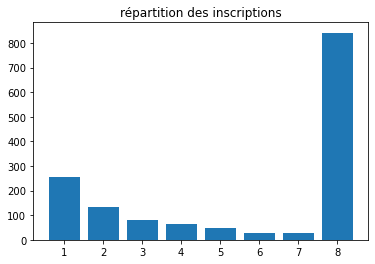

In [18]:
répartition(compte(data))

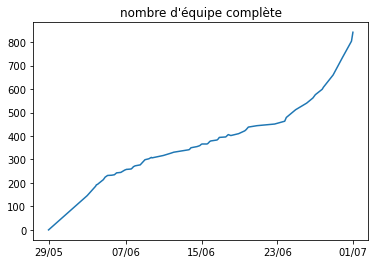

In [26]:
graphe1()